In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [ ]:
!pip install indic_nlp_library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from indicnlp.tokenize import indic_tokenize
from wordcloud import WordCloud

## Combining All News Articles

In [ ]:
df = pd.read_csv('news_dataset.csv')

In [ ]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
df.shape

(1530, 5)

In [ ]:
df.head(10)

,news_title,news_details,news_date,source_name,event
0,"MSP को अधिक प्रभावी बनाने के लिए बनी समिति, संयुक्त किसान मोर्चा के सदस्य शामिल होंगे या नहीं, फैसला आज","जून, 2020 में लाये गये तीन विवादास्पद कृषि कानूनों के खिलाफ चले किसान आंदोलन को समाप्त करने के लिए सरकार और संयुक्त किसान मोर्चा (एसकेएम) के बीच सहमति के बिंदुओं में शामिल न्यूनतम समर्थन मूल्य (एमएसपी) पर समिति गठित करने का वादा किया था.","मंगलवार जुलाई 19, 2022 11:50 AM IST",NDTV News,Kisaan Andolan
1,"संयुक्त किसान मोर्चा करेगा ""वादाखिलाफी विरोधी सभा"" का आयोजन, केंद्र पर लगाया वादे से पीछे हटने का आरोप","सरकार की वादाखिलाफी के विरोध में, 18 जुलाई को संसद के मानसून सत्र की शुरुआत से 31 जुलाई शहीद उधम सिंह की शहादत दिवस तक, देशभर में जिला स्तर पर “वादाखिलाफी विरोधी सभा” आयोजित की जाएगी.","सोमवार जुलाई 4, 2022 07:13 AM IST",NDTV News,Kisaan Andolan
2,"'किसानों को स्टेडियमों में कैद करना चाहती थी केंद्र सरकार, लेकिन...': पंजाब में बोले अरविंद केजरीवाल","केजरीवाल ने कहा, "" दिल्ली सरकार ने आंदोलनरत किसानों की मदद की. उनको पीने का साफ पानी दिया, शौचालय की सुविधा दी, लंगर में खाना खिलाया. हमें खुशी है कि हमने किसान भाइयों की मदद की.""","रविवार मई 22, 2022 07:05 PM IST",NDTV News,Kisaan Andolan
3,किसान आंदोलन में प्रधानमंत्री मोदी पर हमलावर रहे गवर्नर सत्यपाल मलिक ने क्यों की प्रधानमंत्री मोदी की तारीफ़,किसानों के आंदोलन (Kisan Andolan) पर केंद्र सरकार के खिलाफ हमलावर तेवर अपनाते रहे मेघालय के राज्यपाल सत्यपाल मलिक (Satyapal Malik) ने पीएम नरेंद्र मोदी (Narendra Modi) की तारीफ़ की है.,"शुक्रवार अप्रैल 22, 2022 05:53 PM IST",NDTV News,Kisaan Andolan
4,"संयुक्त किसान मोर्चा ने फिर की आंदोलन की घोषणा, सरकार पर लगाया वादे पूरा नहीं करने का आरोप",बैठक में लखीमपुर खीरी मामले में चल रही कानूनी प्रक्रिया की समीक्षा कर चिंता जताई गई कि पुलिस प्रशासन और अभियुक्त मिलकर अपराधियों को बचाने और बेकसूर किसानों को फंसाने की कोशिश कर रहे हैं.,"सोमवार मार्च 14, 2022 07:18 PM IST",NDTV News,Kisaan Andolan
5,"नहीं हो सकी संयुक्त किसान मोर्चा की बैठक, पंजाब में चुनाव लड़ने वालों पर लगाया मीटिंग पर कब्जा करने का आरोप",संयुक्त किसान मोर्चा (एसकेएम) न्यूनतम समर्थन मूल्य (एमएसपी) पर पैनल के गठन समेत किसानों से किए गए वादों पर केंद्र की अबतक की प्रगति की समीक्षा करने के लिए सोमवार को दिल्ली में बैठक करेगा.,"सोमवार मार्च 14, 2022 01:59 PM IST",NDTV News,Kisaan Andolan
6,"वेस्ट यूपी की करीब 70 फीसदी सीटें जीतने में सफल रही बीजेपी, सिर्फ तीन जिलों में मिली बड़ी हार, जानें वजह","मेरठ की सात सीटों में से 4 और मुजफ्फरनगर की 6 सीटों में से चार शामिल हैं. बीजेपी को मुरादाबाद की सभी छह सीटों, रामपुर और संभल, दोनों जिलों की चार में से तीन सीटों पर भी हार का सामना करना पड़ा.","रविवार मार्च 13, 2022 06:41 PM IST",NDTV News,Kisaan Andolan
7,"किसान नेताओं ने मामले वापस लेने के फैसले का स्वागत किया, केंद्र से अन्य वादों को पूरा करने का आग्रह",किसान नेता और एसकेएम की कोर समिति के सदस्य शिव कुमार कक्का ने आंदोलन के दौरान किसानों के खिलाफ दर्ज मामलों को वापस लेने के लिए दिल्ली के उप-राज्यपाल अनिल बैजल और दिल्ली सरकार की सराहना की.,"मंगलवार मार्च 1, 2022 10:32 PM IST",NDTV News,Kisaan Andolan
8,''ये पूजा-पाठ वाले नहीं बल्कि बलि लेने वाले पुजारी हैं'' : भाजपा पर राकेश टिकैत का कटाक्ष,"राकेश टिकैत ने आरोप लगाया कि भाजपा पिछले एक महीन से इस क्षेत्र में एक विशेष बिरादरी को निशाना बनाकर चुनाव प्रचार कर रही है. उन्होंने कहा, ‘‘यह एक संत और सूबे के मुख्यमंत्री को शोभा नहीं देता.","सोमवार फ़रवरी 7, 2022 12:04 AM IST",NDTV News,Kisaan Andolan
9,"राजेवाल और चढ़ूनी ने मिलाया हाथ, बोले- ""वह आगे बढ़ेंगे तो हम बॉर्डर पर नहीं बैठेंगे, सीधे संसद घेरेंगे""",गुरनाम सिंह चढूनी के नेतृत्व वाली संयुक्त संघर्ष पार्टी को 10 सीट मिली हैं. इन 10 सीटों में से 9 सीटों पर पार्टी ने अपने उम्मीदवार घोषित कर दिए हैं.,"गुरुवार जनवरी 20, 2022 12:20 AM IST",NDTV News,Kisaan Andolan


In [ ]:
df.tail(10)

,news_title,news_details,news_date,source_name,event
1520,"श्रीगंगानगर से पकड़ा गया पाकिस्तानी घुसपैठिया, नूपुर शर्मा का कत्ल करने आया था",Sri Ganganagar Rajasthan/ Nupur Sharma पैगंबर मोहम्मद साहब को लेकर टीवी डिबेट के दौरान विवादित बयान देने वाली नूपुर शर्मा ने अपनी जान को खतरा बताते हुए सभी FIR दिल्ली में ट्रांसफर करने की मांग की थी और गिरफ्तारी पर भी रोक लगाने की अपील की थी. जिस पर अदालत 10 अगस्त तक उनके खिलाफ कोई कार्रवाई नहीं करने का हुक्म दिया है. इस बीच श्रीगंगानगर से एक बड़ी खबर सामने आ रही है. दरअसल यहां से एक पाकिस्तानी घुसपैठिये को गिरफ्तार किया गया है. जिसको लेकर दावा किया जा रहा है कि वो नूपुर शर्मा का कत्ल करने के मकसद से आया था.,"Jul 19,2022, 17:14 PM IST",ZEE News,Nupur Sharma Controversy
1521,Nupur Sharma Controversy: लगातार धमकियां मिल रही हैं - नूपुर के वकील,पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा की अर्जी पर आज सुप्रीम कोर्ट में सुनवाई होगी. आपको बता दें कि नूपुर शर्मा के वकील ने कहा है कि नूपुर की जान को खतरा है और उन्हें लगातार धमकियां मिल रही हैं.,"Jul 19,2022, 17:02 PM IST",ZEE News,Nupur Sharma Controversy
1522,"नूपुर को 'सुप्रीम' राहत,जिस बेंच ने की थी सख्त टिप्पणी,उसी ने गिरफ्तारी पर लगाई रोक",बीजेपी की निलंबित प्रवक्ता नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है.मंगलवार को शीर्ष कोर्ट ने नूपुर शर्मा की याचिका पर सुनवाई करते हुए 10 अगस्त तक गिरफ्तारी पर रोक लगा दी है.,"Jul 19,2022, 16:59 PM IST",ZEE News,Nupur Sharma Controversy
1523,Nupur Sharma को Supreme Court से बड़ी राहत,पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है. सुप्रीम कोर्ट ने 10 अगस्त तक नूपुर शर्मा की गिरफ्तारी पर रोक लगा दी है. कोर्ट ने कहा है कि अगर नई FIR भी दर्ज होती है तो भी गिरफ्तारी नहीं होगी.,"Jul 19,2022, 16:12 PM IST",ZEE News,Nupur Sharma Controversy
1524,SC में नूपुर की याचिका पर सुनवाई,नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 14:46 PM IST",ZEE News,Nupur Sharma Controversy
1525,नूपुर शर्मा ने सुप्रीम कोर्ट में नई याचिका दायर करके की ये मांग,नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 13:36 PM IST",ZEE News,Nupur Sharma Controversy
1526,Nupur Sharma का वीडियो देखने पर विवाद.दो पक्षों में हुई झड़प,सीतामढ़ी में युवक को नूपुर शर्मा ( Nupur sharma ) का वीडियो देखने पर चाकू मार देने का मामला सामने आया है...जिससे युवक गंभीर रूप से जख्मी हो गया...देखिए पूरी ख़बर...,"Jul 19,2022, 13:11 PM IST",ZEE News,Nupur Sharma Controversy
1527,Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई,BJP की निलंबित प्रवक्ता नूपुर शर्मा ने एक बार फिर से सुप्रीम कोर्ट का दरवाजा खटखटाया है. Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई.. देखिए वीडियो...,"Jul 19,2022, 12:48 PM IST",ZEE News,Nupur Sharma Controversy
1528,नूपुर शर्मा का वीडियो देखने पर युवक पर चाकूओं से किया गया हमला|,बिहार के सीतामढ़ी में एक युवक पर चाकूओं से हमला किया गया. आरोप है कि मोबाइल पर नूपुर शर्मा का वीडियो देखने पर युवक को निशाना बनाया गया. भरे बाजार दौड़ा दौड़ा कर युवक पर हमला किया.,"Jul 19,2022, 10:46 AM IST",ZEE News,Nupur Sharma Controversy
1529,Khabren Khatakhat: तीस्ता और अहमद पटेल की डील पर रईस खान का खुलासा,खबरें खटाखट सेगमेंट जी न्यूज के महत्वपूर्ण बुलेटिन का एक हिस्सा है जिसमें आप सभी जरूरी खबरें देख सकेंगे.,"Jul 19,2022, 9:20 AM IST",ZEE News,Nupur Sharma Controversy


In [ ]:
df.to_csv('news_dataset_s.csv')

## EDA

In [ ]:
df['source_name'].unique()

array(['NDTV News', 'The Quint', 'ZEE News'], dtype=object)

In [ ]:
df.groupby('source_name')['event'].count()

source_name
NDTV News    867
The Quint    254
ZEE News     409
Name: event, dtype: int64

In [ ]:
source = list(df.groupby('source_name')['event'].count().index)
source

['NDTV News', 'The Quint', 'ZEE News']

In [ ]:
src_cnt = list(df.groupby('source_name')['event'].count().values)
src_cnt

[867, 254, 409]

Text(0.5, 1.0, 'Channels vs News Articles')

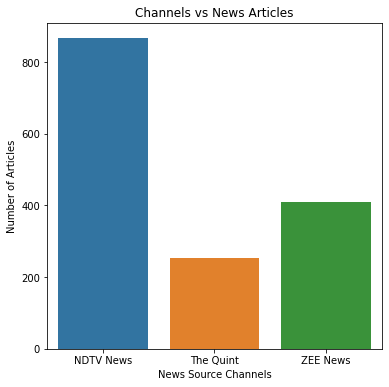

In [ ]:
fig = plt.figure(figsize = (6, 6))
sns.barplot(x = source, y = src_cnt)
plt.xlabel('News Source Channels')
plt.ylabel('Number of Articles')
plt.title('Channels vs News Articles')

In [ ]:
df.groupby('event')['news_title'].count()

event
Hijab Controversy           375
Kisaan Andolan              477
Money Laundering            308
Nupur Sharma Controversy    370
Name: news_title, dtype: int64

In [ ]:
event_name = list(df.groupby('event')['news_title'].count().index)
event_news_cnt = list(df.groupby('event')['news_title'].count().values)

Text(0.5, 1.0, 'Event VS Number of Articles')

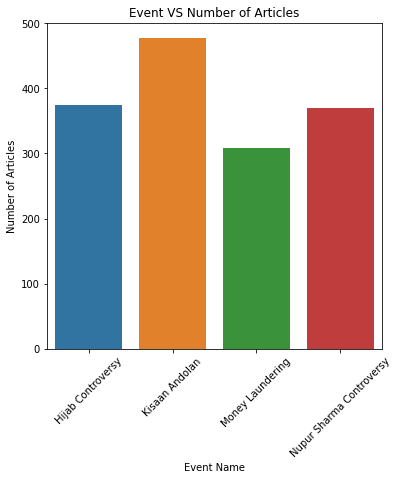

In [ ]:
fig = plt.figure(figsize = (6, 6))
sns.barplot(x = event_name, y = event_news_cnt)
plt.xticks(rotation = 45)

plt.xlabel('Event Name')
plt.ylabel('Number of Articles')
plt.title('Event VS Number of Articles')

In [ ]:
df.groupby(['event', 'source_name'])['news_title'].count()

event                     source_name
Hijab Controversy         NDTV News      240
                          The Quint       14
                          ZEE News       121
Kisaan Andolan            NDTV News      237
                          The Quint      240
Money Laundering          NDTV News      259
                          ZEE News        49
Nupur Sharma Controversy  NDTV News      131
                          ZEE News       239
Name: news_title, dtype: int64

In [ ]:
news_wise_event = df.groupby(['event', 'source_name'])['news_title'].count()

In [ ]:
hijab_news = list(news_wise_event['Hijab Controversy'].index)
hijab_cnt = list(news_wise_event['Hijab Controversy'].values)

kisaan_news = list(news_wise_event['Kisaan Andolan'].index)
kisaan_cnt = list(news_wise_event['Kisaan Andolan'].values)

ml_news = list(news_wise_event['Money Laundering'].index)
ml_cnt = list(news_wise_event['Money Laundering'].values)

nupur_news = list(news_wise_event['Nupur Sharma Controversy'].index)
nupur_cnt = list(news_wise_event['Nupur Sharma Controversy'].values)

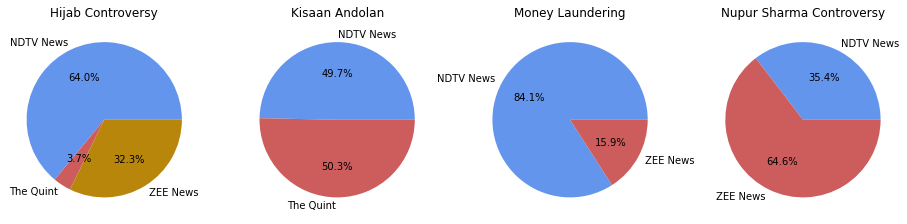

In [ ]:
figure,axis = plt.subplots(1,4,figsize=(16,10))
# Creating plot

colors_list = ['cornflowerblue', 'indianred', 'darkgoldenrod']

axis[0].pie(hijab_cnt, labels = hijab_news, autopct = '%1.1f%%',colors = colors_list)
axis[0].title.set_text('Hijab Controversy')

axis[1].pie(kisaan_cnt, labels = kisaan_news, autopct = '%1.1f%%',colors = colors_list)
axis[1].title.set_text('Kisaan Andolan')

axis[2].pie(ml_cnt, labels = ml_news, autopct = '%1.1f%%',colors = colors_list)
axis[2].title.set_text('Money Laundering')

axis[3].pie(nupur_cnt, labels = nupur_news, autopct = '%1.1f%%',colors = colors_list)
axis[3].title.set_text('Nupur Sharma Controversy')

# show plot
plt.show()

## NLP - Text Pre-processing

In [ ]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [ ]:
for i in range(len(df)):
    df['news_title'][i] = [s.replace("\n", "") for s in df['news_title'][i]]

In [ ]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [ ]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

,news_title,news_details,news_date,source_name,event,word_count
1520,"[श्रीगंगानगर, पकड़ा, पाकिस्तानी, घुसपैठिया, नूपुर, शर्मा, कत्ल, आया]",Sri Ganganagar Rajasthan/ Nupur Sharma पैगंबर मोहम्मद साहब को लेकर टीवी डिबेट के दौरान विवादित बयान देने वाली नूपुर शर्मा ने अपनी जान को खतरा बताते हुए सभी FIR दिल्ली में ट्रांसफर करने की मांग की थी और गिरफ्तारी पर भी रोक लगाने की अपील की थी. जिस पर अदालत 10 अगस्त तक उनके खिलाफ कोई कार्रवाई नहीं करने का हुक्म दिया है. इस बीच श्रीगंगानगर से एक बड़ी खबर सामने आ रही है. दरअसल यहां से एक पाकिस्तानी घुसपैठिये को गिरफ्तार किया गया है. जिसको लेकर दावा किया जा रहा है कि वो नूपुर शर्मा का कत्ल करने के मकसद से आया था.,"Jul 19,2022, 17:14 PM IST",ZEE News,Nupur Sharma Controversy,8
1521,"[Nupur, Sharma, Controversy, लगातार, धमकियां, मिल, नूपुर, वकील]",पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा की अर्जी पर आज सुप्रीम कोर्ट में सुनवाई होगी. आपको बता दें कि नूपुर शर्मा के वकील ने कहा है कि नूपुर की जान को खतरा है और उन्हें लगातार धमकियां मिल रही हैं.,"Jul 19,2022, 17:02 PM IST",ZEE News,Nupur Sharma Controversy,8
1522,"[नूपुर, सुप्रीम, राहत, बेंच, सख्त, टिप्पणी, गिरफ्तारी, लगाई, रोक]",बीजेपी की निलंबित प्रवक्ता नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है.मंगलवार को शीर्ष कोर्ट ने नूपुर शर्मा की याचिका पर सुनवाई करते हुए 10 अगस्त तक गिरफ्तारी पर रोक लगा दी है.,"Jul 19,2022, 16:59 PM IST",ZEE News,Nupur Sharma Controversy,9
1523,"[Nupur, Sharma, Supreme, Court, बड़ी, राहत]",पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है. सुप्रीम कोर्ट ने 10 अगस्त तक नूपुर शर्मा की गिरफ्तारी पर रोक लगा दी है. कोर्ट ने कहा है कि अगर नई FIR भी दर्ज होती है तो भी गिरफ्तारी नहीं होगी.,"Jul 19,2022, 16:12 PM IST",ZEE News,Nupur Sharma Controversy,6
1524,"[SC, नूपुर, याचिका, सुनवाई]",नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 14:46 PM IST",ZEE News,Nupur Sharma Controversy,4
1525,"[नूपुर, शर्मा, सुप्रीम, कोर्ट, नई, याचिका, दायर, करके, मांग]",नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 13:36 PM IST",ZEE News,Nupur Sharma Controversy,9
1526,"[Nupur, Sharma, वीडियो, देखने, विवाद, पक्षों, झड़प]",सीतामढ़ी में युवक को नूपुर शर्मा ( Nupur sharma ) का वीडियो देखने पर चाकू मार देने का मामला सामने आया है...जिससे युवक गंभीर रूप से जख्मी हो गया...देखिए पूरी ख़बर...,"Jul 19,2022, 13:11 PM IST",ZEE News,Nupur Sharma Controversy,7
1527,"[Nupur, Sharma, याचिका, Supreme, Court, सुनवाई]",BJP की निलंबित प्रवक्ता नूपुर शर्मा ने एक बार फिर से सुप्रीम कोर्ट का दरवाजा खटखटाया है. Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई.. देखिए वीडियो...,"Jul 19,2022, 12:48 PM IST",ZEE News,Nupur Sharma Controversy,6
1528,"[नूपुर, शर्मा, वीडियो, देखने, युवक, चाकूओं, हमला]",बिहार के सीतामढ़ी में एक युवक पर चाकूओं से हमला किया गया. आरोप है कि मोबाइल पर नूपुर शर्मा का वीडियो देखने पर युवक को निशाना बनाया गया. भरे बाजार दौड़ा दौड़ा कर युवक पर हमला किया.,"Jul 19,2022, 10:46 AM IST",ZEE News,Nupur Sharma Controversy,7
1529,"[Khabren, Khatakhat, तीस्ता, अहमद, पटेल, डील, रईस, खान, खुलासा]",खबरें खटाखट सेगमेंट जी न्यूज के महत्वपूर्ण बुलेटिन का एक हिस्सा है जिसमें आप सभी जरूरी खबरें देख सकेंगे.,"Jul 19,2022, 9:20 AM IST",ZEE News,Nupur Sharma Controversy,9


In [ ]:
def generate_stem_words(word):
    suffixes = {
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"नी",u"ना",u"ते",u"ती",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}
    for L in 5, 4, 3, 2:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

In [ ]:
for i in range(len(df)):
    tokens = []
    for ele in df['news_title'][i]:
        tokens.append(generate_stem_words(ele))
    df['news_title'][i] = tokens  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
corpus_list_hijab = []
corpus_list_kisaan = []
corpus_list_money = []
corpus_list_nupur = []

for i in range(len(df)):
    if(df['event'][i] == 'Kisaan Andolan'):
        corpus_list_kisaan +=df['news_title'][i]

    elif(df['event'][i] == 'Hijab Controversy'):
        corpus_list_hijab += df['news_title'][i]
    
    elif(df['event'][i] == 'Money Laundering'):
        corpus_list_money +=df['news_title'][i]

    else:
        corpus_list_nupur +=df['news_title'][i]

counter_hijab = collections.Counter(corpus_list_hijab)
counter_kisaan = collections.Counter(corpus_list_kisaan)
counter_money = collections.Counter(corpus_list_money)
counter_nupur = collections.Counter(corpus_list_nupur)

print(counter_hijab)
print(counter_kisaan)
print(counter_money)
print(counter_nupur)


Counter({'हिजाब': 319, 'कर्नाटक': 112, 'विवाद': 103, 'मुस्लिम': 46, 'छात्र': 45, 'सुनव': 43, 'कोर्ट': 43, 'कॉलेज': 39, 'मामले': 37, 'Hijab': 33, 'सुप्रीम': 30, 'ले': 28, 'पहन': 27, 'महिल': 24, 'बोले': 23, 'क्या': 22, 'महिला': 21, 'बात': 21, 'SC': 20, 'फैसले': 20, 'ईरान': 19, 'लग': 19, 'स्कूल': 19, 'बीच': 19, 'HC': 19, '5': 19, 'सरकार': 18, 'छात्रा': 18, 'प्रदर्शन': 17, 'मामला': 17, 'खिलाफ': 16, 'क्य': 16, 'पहनने': 15, 'फैसला': 15, 'जान': 15, 'बैन': 15, 'बन': 15, 'प्रतिबंध': 15, 'मंत्री': 15, 'भारत': 14, 'वायरल': 14, 'दौरान': 14, 'Row': 13, 'दे': 13, 'चाह': 13, 'विरोध': 12, 'मौत': 12, 'अब': 12, 'देने': 12, 'परीक्षा': 12, 'आदेश': 12, 'हाईकोर्ट': 12, 'वाली': 12, 'आरोप': 11, 'बवाल': 11, 'साल': 11, 'बहस': 11, 'वीडियो': 11, 'VIDEO': 11, 'जज': 11, 'लड़क': 10, 'दिन': 10, 'बाल': 10, 'अधिकार': 10, 'जरूरी': 10, 'अहम': 10, 'हिंदू': 10, 'जारी': 10, 'हाई': 10, 'धर्म': 10, 'जबरदस्त': 10, 'भगवा': 10, 'अनिवार्य': 9, 'पहुंची': 9, 'ढक': 9, 'दी': 9, 'गिरफ्तार': 9, 'याचिकाकर्ता': 9, 'सिर': 9, 'पर्दा': 9, '

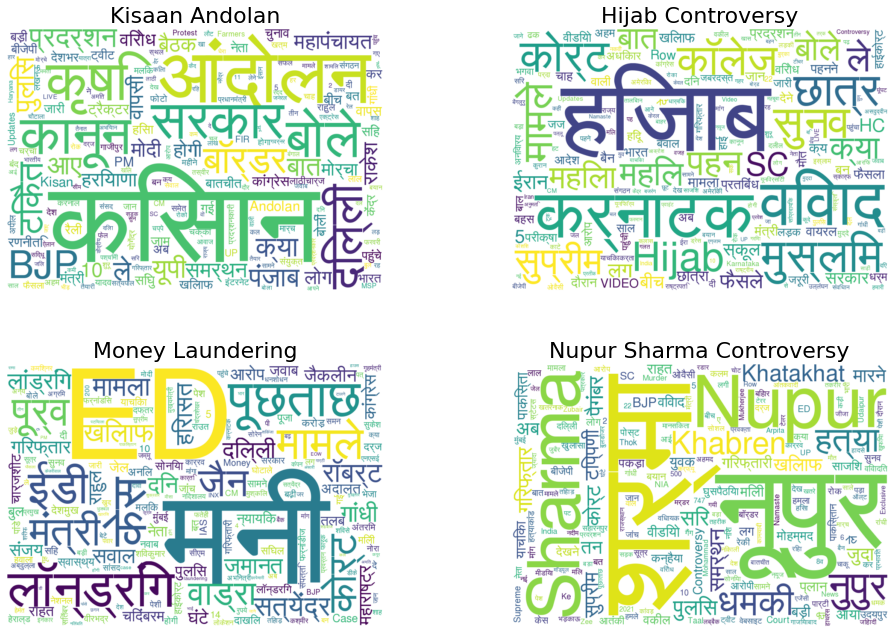

In [ ]:
font = "gargi.ttf"

figure,axis = plt.subplots(2,2,figsize=(16,10))
figure.tight_layout(pad=5.0)

wordcloud_kisaan = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(counter_kisaan)

wordcloud_hijaab = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(counter_hijab)

wordcloud_money = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(counter_money)

wordcloud_nupur = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(counter_nupur)

axis[0][0].imshow(wordcloud_kisaan,interpolation="bilinear")
axis[0][0].axis('off')
axis[0][0].set_title('Kisaan Andolan', fontsize=22)
 
axis[0][1].imshow(wordcloud_hijaab,interpolation="bilinear")
axis[0][1].axis('off')
axis[0][1].set_title('Hijab Controversy', fontsize=22)

axis[1][0].imshow(wordcloud_money,interpolation="bilinear")
axis[1][0].axis('off')
axis[1][0].set_title('Money Laundering', fontsize=22)

axis[1][1].imshow(wordcloud_nupur,interpolation="bilinear")
axis[1][1].axis('off')
axis[1][1].set_title('Nupur Sharma Controversy', fontsize=22)

plt.axis("off")
plt.tight_layout(pad = 5.0)


plt.show()

In [ ]:
print(list(counter_hijab)[:20])
print(list(counter_kisaan)[:20])
print(list(counter_money)[:20])
print(list(counter_nupur)[:20])

['हिजाब', 'विवाद', 'खिलाफ', 'दुनियाभर', 'भड़की', 'आग', 'Iran', 'विरोध', 'जल', 'ईरान', 'लोग', 'सुप्रीम', 'लीडर', 'खामनेई', 'तस्वीर', 'लग', 'मुल्ल', 'जा', 'होगा', 'नारे']
['MSP', 'अधिक', 'प्रभावी', 'बन', 'समिति', 'संयुक्त', 'किसान', 'मोर्चा', 'सदस्य', 'शामिल', 'होंगे', 'फैसला', 'कर', 'वादाखिलाफी', 'विरोधी', 'सभा', 'आयोजन', 'केंद्र', 'लग', 'वादे']
['मनी', 'लॉन्डरिंग', 'केस', 'बॉलीवुड', 'अभिनेत्री', 'जैकलीन', 'फर्नांडिस', 'मिली', 'अंतरिम', 'ज़मानत', 'फर्नांडीज', 'दिल्ली', 'पटियाला', 'हाउस', 'कोर्ट', 'बतौर', 'आरोपी', 'पेशी', 'सत्येंद्र', 'जैन']
['उमेश', 'कोल्हे', 'हत्याकांड', 'NIA', 'आरोपी', 'शमीम', 'अहमद', 'रखा', '2', 'लाख', 'रुपये', 'इनाम', 'निलंबित', 'BJP', 'नेता', 'नूपुर', 'शर्मा', 'गिरफ्तारी', 'याचिका', 'सुप्रीम']
